In [37]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import PIL 
import tensorflow as tf 
  
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 
import pathlib

In [10]:
print(tf.__version__)

2.16.1


In [41]:
_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

data_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')
data_dir = pathlib.Path(data_dir) #converting string to path object

In [40]:
image_count = len(list(data_dir.glob('*/*.jpg'))) 
print(image_count) 

3670


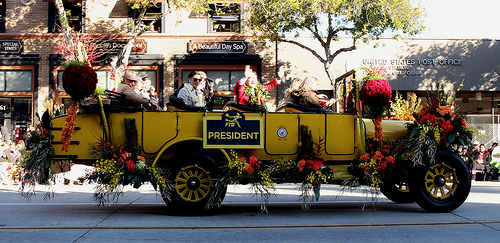

In [44]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0])) #PIL is the python image lib

In [46]:
#creating a model
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,# 20% is test
    subset = "training",
    seed = 123, #this is like the random variable that helps ensure that each time the same output is received.
    image_size = (180,180), 
    batch_size = 32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [47]:
#we can find out the class names
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


2024-06-11 06:37:14.767571: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


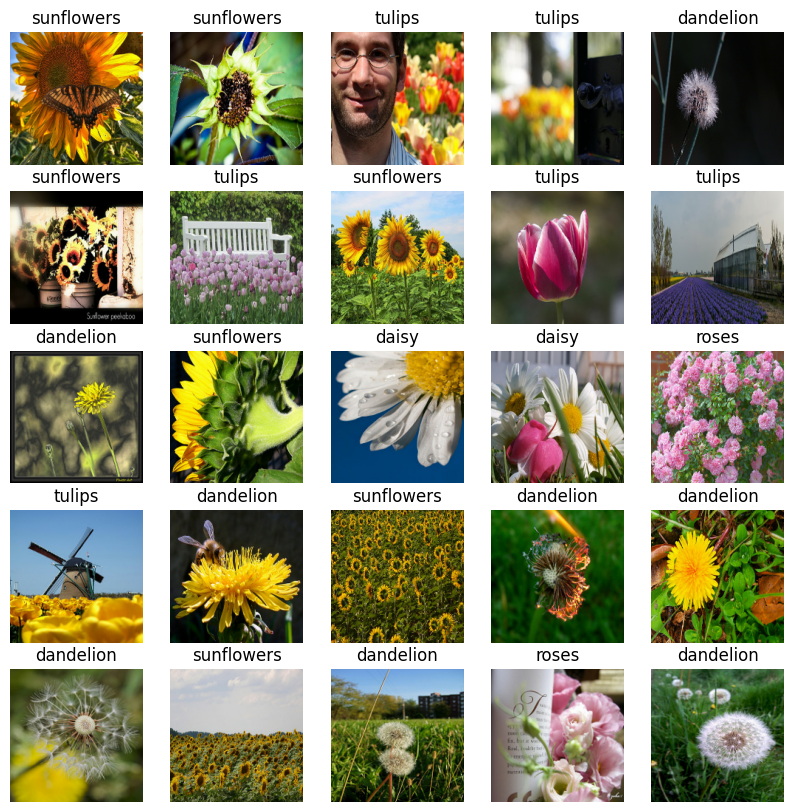

In [49]:
#we can now visulaize the data set 
import matplotlib.pyplot as plt 
  
plt.figure(figsize=(10, 10)) 
  
for images, labels in train_ds.take(1): #fetches the first batch of the data set
    for i in range(25): #this suggests each batch contains atleast 25 images
        ax = plt.subplot(5, 5, i + 1) #this creates a grid of 5 by 5 rows and the i+1 increments the index
        plt.imshow(images[i].numpy().astype("uint8")) 
        plt.title(class_names[labels[i]]) 
        plt.axis("off") 

In [51]:
#now we design the CNN using the sequential model.
num_classes = len(class_names) 
  
model = Sequential([ 
    layers.Rescaling(1./255, input_shape=(180,180, 3)), #helps re scale the pixels and set the height and width to 180 w 3 colrs RGB
    layers.Conv2D(16, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Conv2D(64, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Flatten(), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(num_classes) 
]) 

In [52]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy( 
                  from_logits=True), 
              metrics=['accuracy']) 
model.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
epochs=3
history = model.fit( 
  train_ds, 
  validation_data=train_ds, 
  epochs=epochs 
) 

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 47s 517ms/step - accuracy: 0.6251 - loss: 0.9424 - val_accuracy: 0.6798 - val_loss: 0.8684
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 47s 514ms/step - accuracy: 0.7145 - loss: 0.7778 - val_accuracy: 0.7810 - val_loss: 0.6205
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 47s 516ms/step - accuracy: 0.7838 - loss: 0.5822 - val_accuracy: 0.8815 - val_loss: 0.3495
